Loading Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading Dataset

In [156]:
df = pd.read_csv("CrabAgePrediction.csv")

In [157]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [158]:
#check the shape of the data
df.shape

(3893, 9)

In [159]:
#describe the dataframe
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [160]:
#check the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

###### There is no null values in given dataset

In [161]:
# Explore Age ranges (in years)

print(f'Maximum age : {df['Age'].max()/12}')

print(f'Average age : {df['Age'].mean()/12}')

print(f'Minimum age : {df['Age'].min()/12}')

Maximum age : 2.4166666666666665
Average age : 0.8295658874903674
Minimum age : 0.08333333333333333


In [162]:
df1 = df.copy()

print(type(df1))


<class 'pandas.core.frame.DataFrame'>


# Data Cleaning

### Outliers Removal

Here we use most common method of outlier removal is IQR (Inter Quartile Range ) method.
It identifying the datapoints that fall more than 1.5 times  the IQR below the first-quartile(Q1) or above the third-quartile(Q3)

In [163]:
# Select only numeric columns
df1 = df1.select_dtypes(include=['number'])

#Calculate the First Quartile(Q1), third Quartile(Q2) and IQR for all columns
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
IQR

# find any data points that fall more than 1.5 times the IQR below Q1 or above Q3 for all columns
#find the rows containing outliers in any columns
outliers = df1[((df1 <(Q1 - 1.5 * IQR)) | (df1 >(Q3 + 1.5 * IQR))).apply(lambda x: x.any(), axis=1)]

#Remove the outliers from the DataFrame
df2 = df1[~((df1 < (Q1-1.5*IQR)) | (df1 >(Q3+1.5*IQR))).any(axis=1)]

print("Outliers :\n", outliers)




Outliers :
       Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
33    1.4875    1.1875  0.4250  35.351827       13.607760        6.378637   
52    1.3750    1.1000  0.4125  24.394745        8.845044        4.791066   
55    1.7750    1.4125  0.4875  48.945412       18.086981        9.539607   
79    1.9375    1.4250  0.5500  57.606184       20.836883       13.480187   
82    1.5750    1.2875  0.4000  28.803092       11.949314        6.917278   
...      ...       ...     ...        ...             ...             ...   
3815  1.8625    1.4625  0.5375  70.845400       26.265812       13.380964   
3818  1.2375    1.0000  0.3875  18.271253        6.860579        3.756309   
3862  1.7125    1.3125  0.4375  48.477645       15.351254        8.759996   
3867  1.0750    0.8500  0.0000  12.133586        5.854172        2.438057   
3870  1.7000    1.3750  0.5000  45.245802       14.883487       11.552421   

      Shell Weight  Age  
33       12.048538   20  
52        8

In [164]:

print("\n DataFrame without outliers \n", df2)


 DataFrame without outliers 
       Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0     1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1     0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2     1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3     1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4     0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   
...      ...       ...     ...        ...             ...             ...   
3888  1.4625    1.1375  0.3250  24.819987       11.651644        5.854172   
3889  1.5500    1.2125  0.4375  34.458817       15.450477        7.172423   
3890  0.6250    0.4625  0.1625   2.012815        0.765436        0.524466   
3891  1.0625    0.7750  0.2625  10.347568        4.507570        2.338834   
3892  0.7875    0.6125  0.2125   4.068153        1.502523        1.346601   

      Shell Weight  Age  
0         6.747181

# Exploratory Data Analysis
Understanding the dataset to summarize the main characteristics, uncover pattern and identify the relationship between variables.

EDA can be performed by using statistical and visualization techniques such as histogram, scatter plot, box plots and correlation matrix

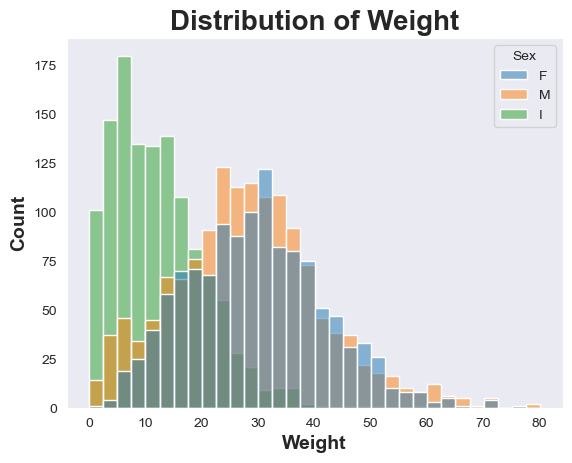

In [165]:
#Creating a histogram to visualize the distribution of the 'Weight' column.
sns.histplot (data = df, x = "Weight", hue = 'Sex') # The 'hue' parameter adds color coding based on the 'Sex' column.
plt.title("Distribution of Weight", fontdict={'size': 20, 'weight': 'bold'})
plt.xlabel('Weight', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel('Count',fontdict={'size': 14, 'weight': 'bold'})
plt.show()

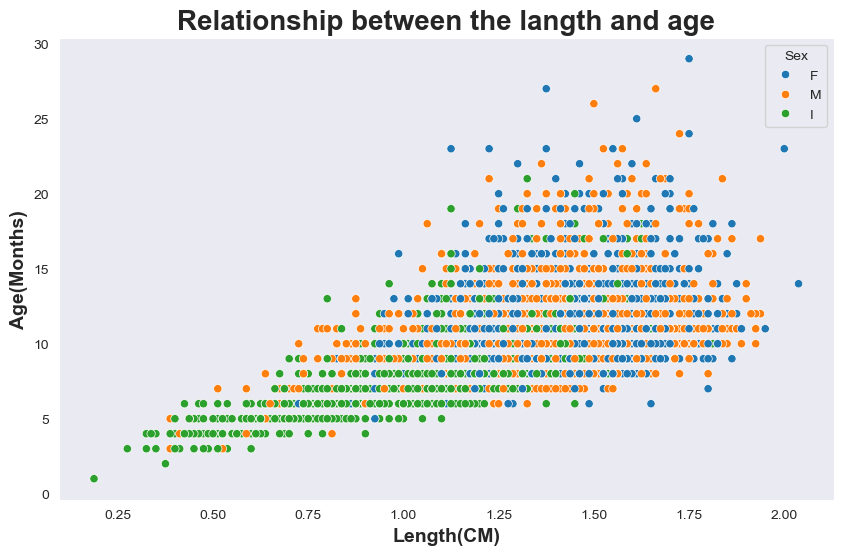

In [166]:
#Creating a Scatter plot to visualize the Relationship between the length and age column.
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = "Length", y = "Age", hue = "Sex")
plt.title("Relationship between the langth and age",fontdict={'size': 20, 'weight': 'bold'})
plt.xlabel('Length(CM)', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel("Age(Months)", fontdict={'size': 14, 'weight': 'bold'})
plt.show()

###### Plotly Express is a high level interface for creating interactive visualizations using the plotly library. it allow you to create wide range of plots 

In [167]:
import plotly.express as px
 
fig = px.scatter(df, x="Weight", y="Age", color="Sex", title="Age over Weight")

# Customize the title and axis labels
fig.update_layout(
    title={'text': "Age over Weight", 'x': 0.5, 'xanchor': 'center', 'font': {'size': 20, 'weight': 'bold'}},
    xaxis_title="Weight",
    yaxis_title="Age",
    font=dict(size=14)  # This will apply to all text in the plot
)

fig.show()


In [168]:
fig = px.scatter(df, x="Diameter", y="Age", color="Sex", title="Age over Diameter")
# Customize the title and axis labels
fig.update_layout(
    title={'text': "Age over Weight", 'x': 0.5, 'xanchor': 'center', 'font': {'size': 20, 'weight': 'bold'}},
    xaxis_title="Weight",
    yaxis_title="Age",
    font=dict(size=14)  # This will apply to all text in the plot
)
fig.show()

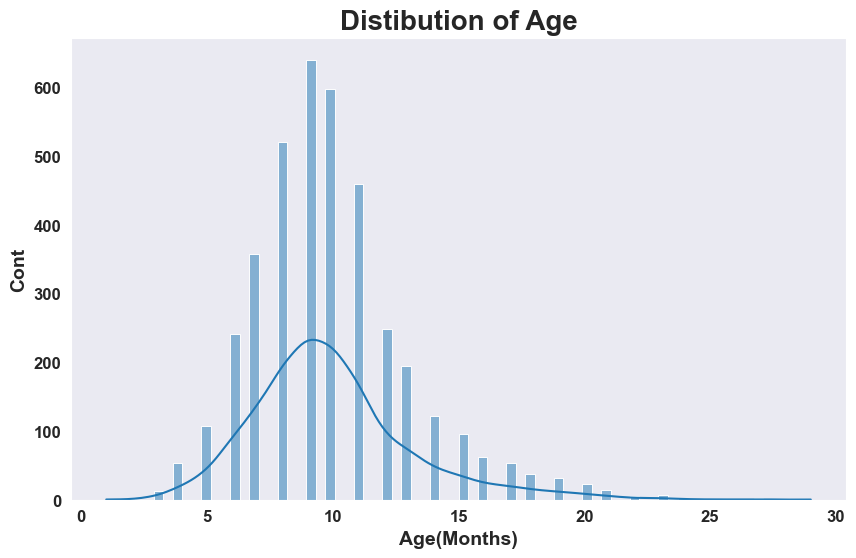

In [169]:
#Creating the histplot to visualize the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = "Age", kde = True)
plt.title("Distibution of Age", fontdict={'size': 20, 'weight': 'bold'})

plt.xlabel("Age(Months)", fontdict={'size': 14, 'weight': 'bold'})
plt.xticks(fontsize=12, fontweight='bold') 

plt.ylabel("Cont", fontdict={'size': 14, 'weight': 'bold'})
plt.yticks(fontsize=12, fontweight='bold') 

plt.show()


###### It show the normal distribution of the Age

C:\Users\suyash\AppData\Local\Temp\ipykernel_20920\3095479964.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




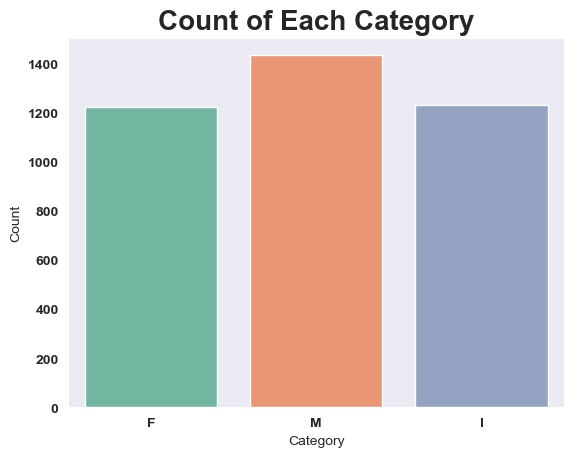

In [170]:
# Example: Countplot with different color palette
sns.countplot(data=df, x="Sex", palette="Set2")  # You can use different palette names like 'Set2', 'husl', 'coolwarm', etc.
plt.title("Count of Each Category", fontdict={'size': 20, 'weight': 'bold'})


plt.xlabel("Category")
plt.xticks(fontsize=10, fontweight='bold') 

plt.ylabel("Count")
plt.yticks(fontsize=10, fontweight='bold') 

plt.show()

C:\Users\suyash\AppData\Local\Temp\ipykernel_20920\860990465.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




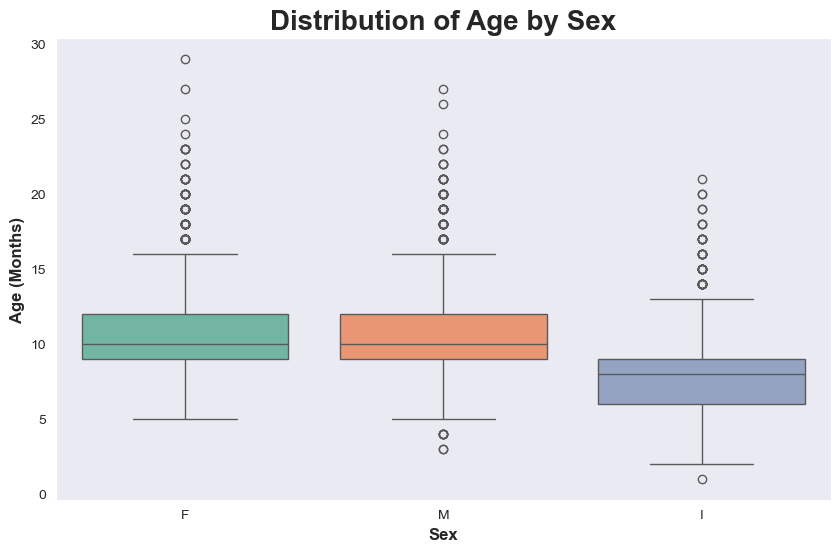

In [171]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sex", y="Age", palette="Set2")
# Setting title and labels with fontdict
plt.title("Distribution of Age by Sex", fontdict={'size': 20, 'weight': 'bold'})
plt.xlabel('Sex', fontdict={'size': 12, 'weight': 'bold'})
plt.ylabel('Age (Months)', fontdict={'size': 12, 'weight': 'bold'})

# Display the plot
plt.show()


###### Pairplot is showing the pairwise relationships between the variables Length, Diameter, Height, Weight, and Age, with the points colored by the Sex variable.

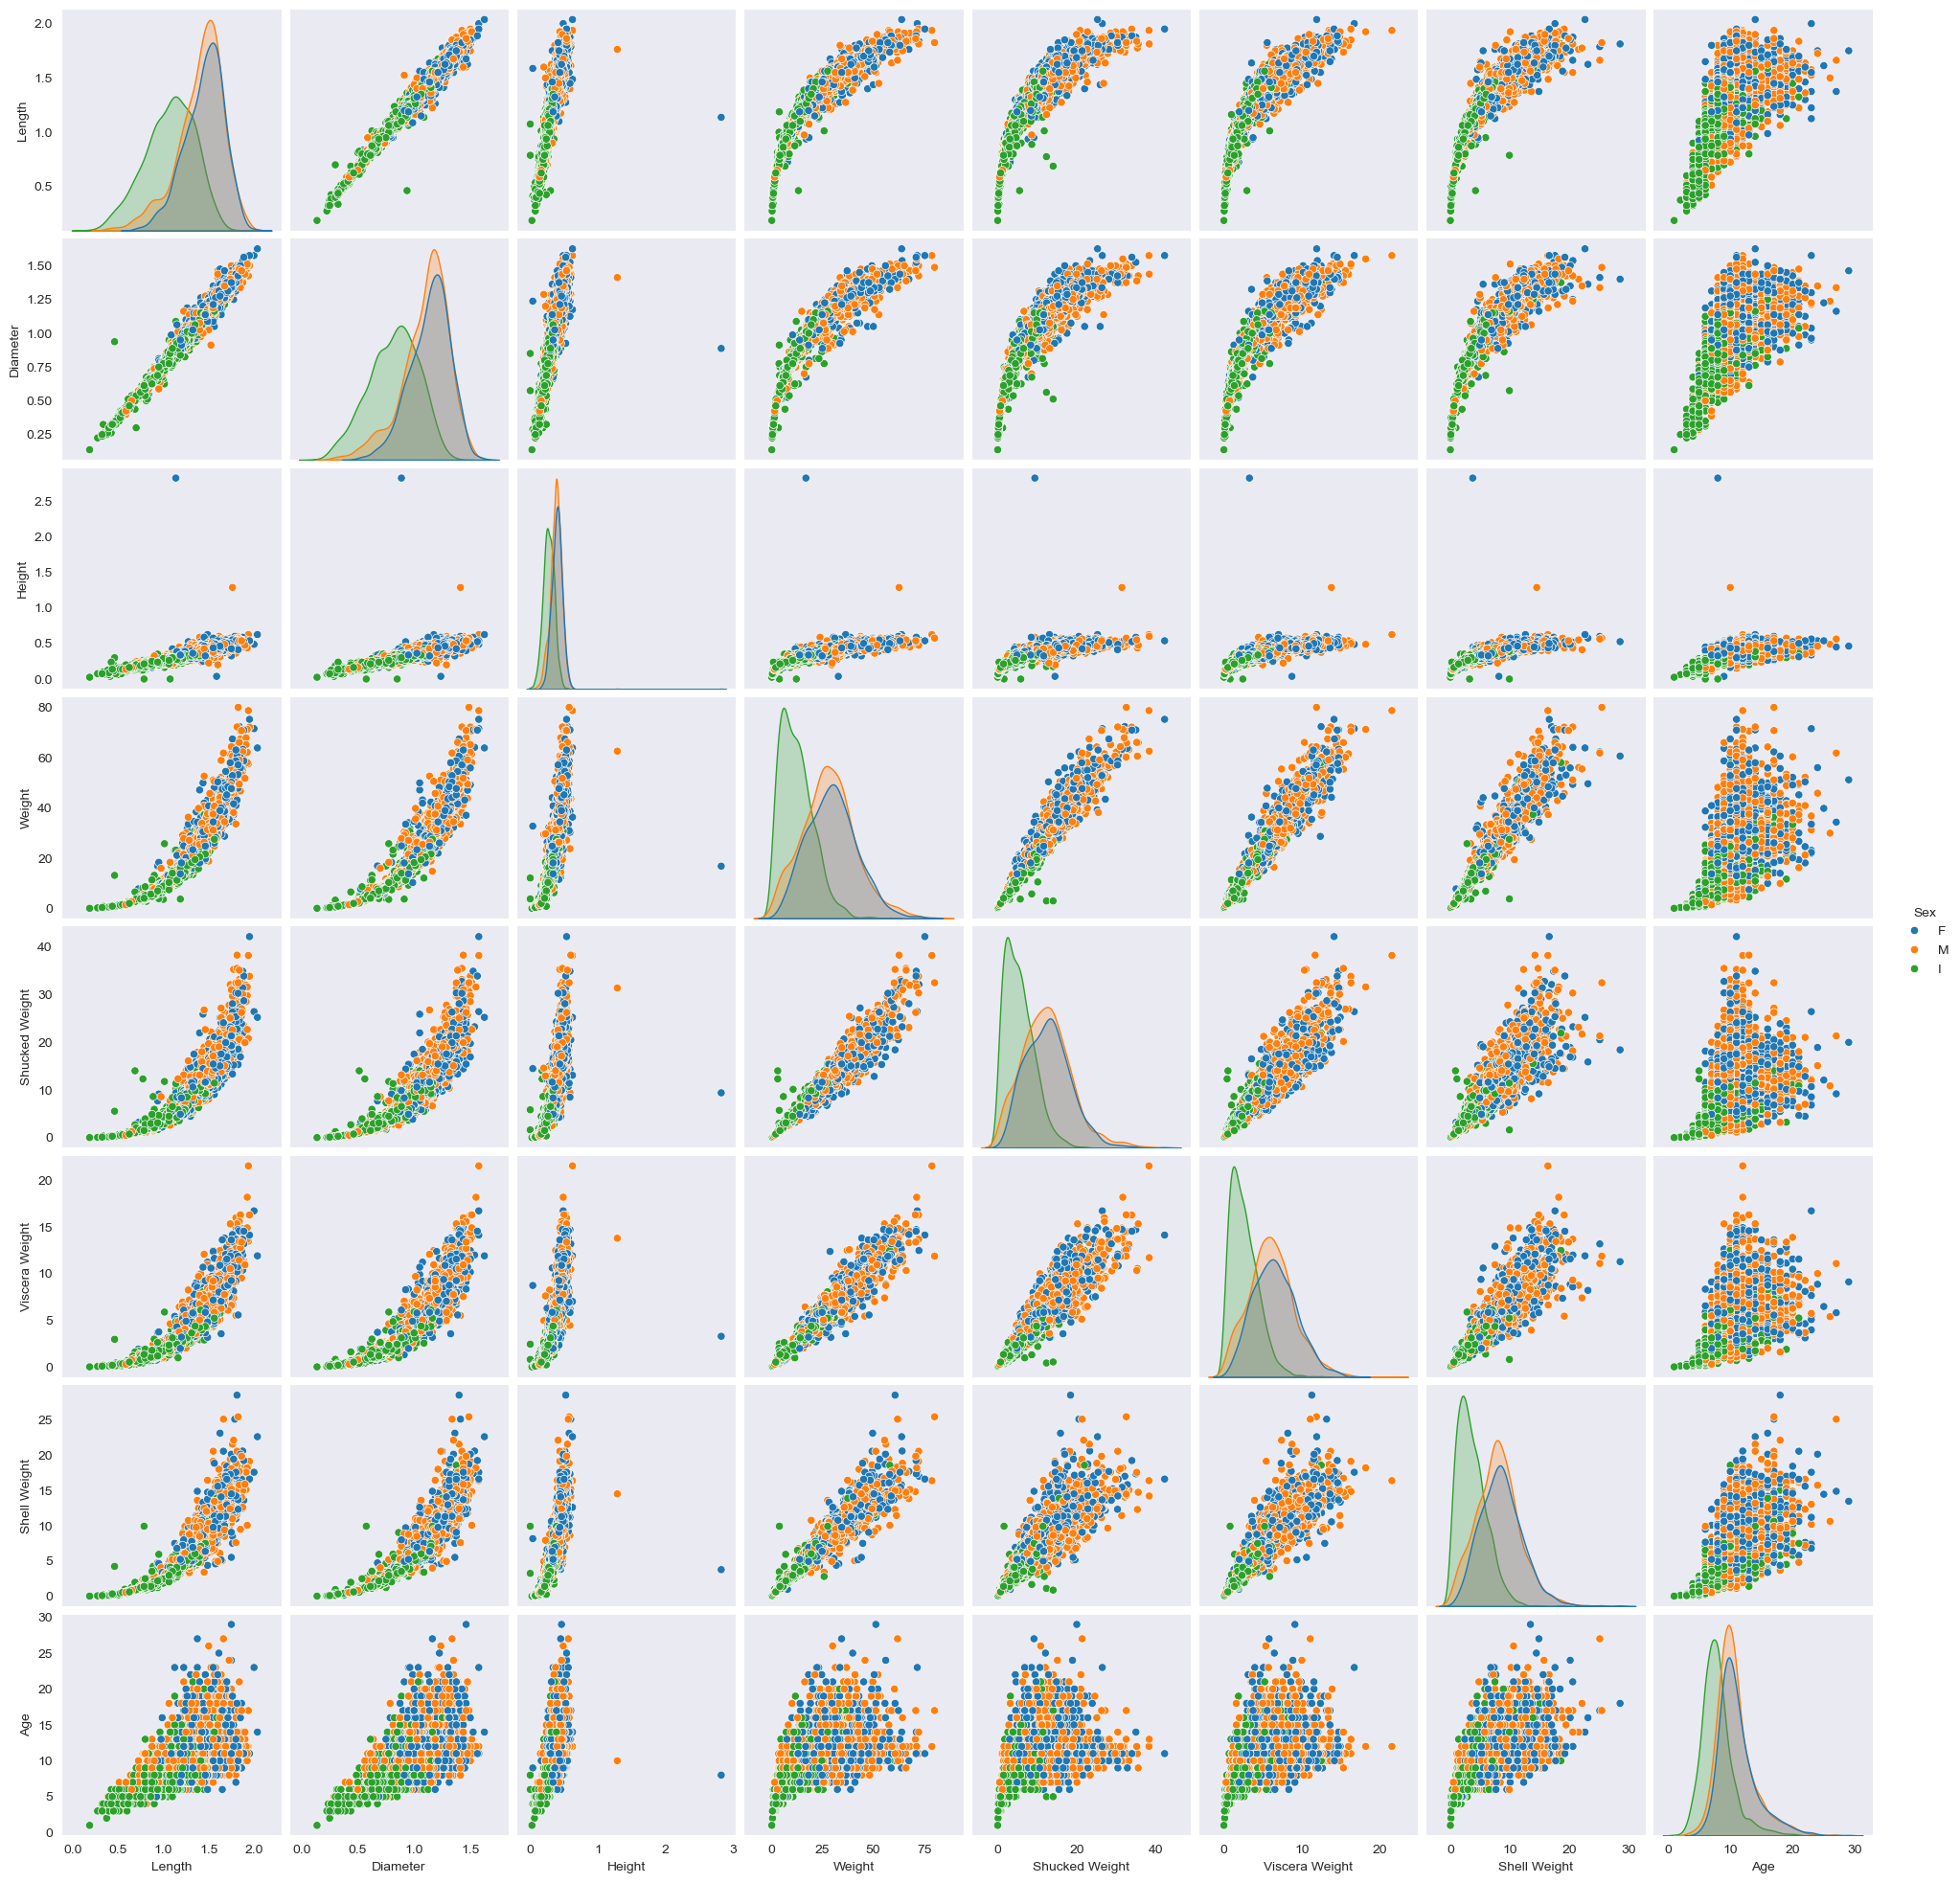

In [172]:
sns.pairplot(data=df, vars=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age'], hue='Sex')
plt.show()

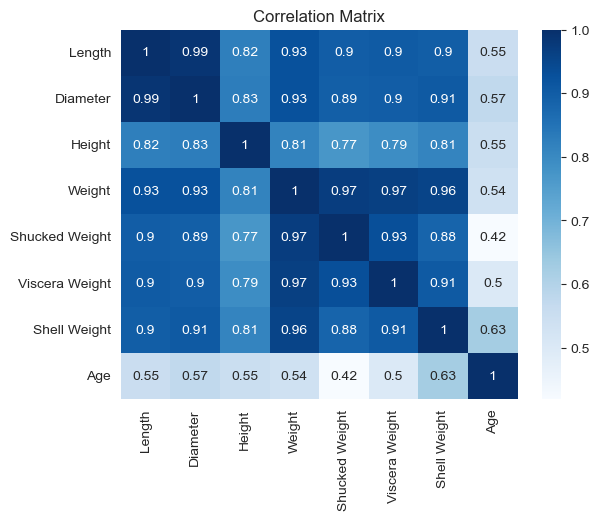

In [173]:
df_numeric = df.select_dtypes(include=['number'])
corr1 = df_numeric.corr()
sns.heatmap(corr1, cmap ="Blues", annot= True)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [174]:
#Calculate the BMI (Body Mass Index).
#This can be useful for predicting the age of the crab, as longer and older crabs may have a higher BMI

df['BMI'] = df['Weight']/(df['Length'] ** 2)

In [175]:
#Calculate the diameter ratio
df['Len_dia_ratio'] = df['Length']/df['Diameter']

#Calculate the weith to shucked weight ratio
df['Weight_shuckedweight_ratio'] = df['Weight'] / df1['Shucked Weight']

In [176]:
#product of Length , height and weight

df['Length_height_weight'] = df['Length'] * df['Height'] * df['Weight']

In [177]:
# One-Hot-Encoding for 'Sex'
X = df.drop(columns='Age', axis= 1)
y = df['Age']

In [178]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [179]:
# Ensure that the data is a DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [180]:
# Preprocessing pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex']),  # Encode categorical 'Sex'
        ('scale', StandardScaler(), ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
                                     'Viscera Weight', 'Shell Weight', 'BMI', 'Len_dia_ratio',
                                     'Weight_shuckedweight_ratio', 'Length_height_weight'])
    ]
)


In [181]:
# Fit and transform the train data, then transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [182]:


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3114, 14)
(779, 14)
(3114,)
(779,)


In [183]:
X_train

array([[ 0.        ,  0.        ,  1.        , ..., -0.70800773,
         0.67097041,  1.13125265],
       [ 0.        ,  0.        ,  1.        , ...,  0.09069594,
        -0.513892  ,  0.9537773 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.03900807,
         0.03044814,  2.0685826 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.65296346,
         0.29462602, -0.65299563],
       [ 0.        ,  1.        ,  0.        , ..., -0.25816313,
        -0.05224249, -0.9921028 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.25323915,
        -0.26084743,  1.10709922]])

### Building a Model

In [184]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [185]:


# Define Model layers
model = keras.Sequential([
    # Input layer
    layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),

    # Hidden layer 1
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.3),  # Dropout to reduce overfitting

    # Hidden layer 2
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  

    # Hidden layer 3
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  

    # Output layer
    layers.Dense(1)  # Single output neuron for regression
])

# Print model summary
model.summary()


f:\Jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,009 (187.54 KB)

 Trainable params: 48,009 (187.54 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
#Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )

In [187]:
# Early stopper to stop the epochs
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )

In [188]:
#fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size = 32,
                    epochs = 100,
                    callbacks = [early_stoping],# callback to stop iteration when val loss stops decreasing
                    verbose= 1
                    )



Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 50.9142 - root_mean_squared_error: 6.9663 - val_loss: 6.6500 - val_root_mean_squared_error: 2.5788
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.4793 - root_mean_squared_error: 3.2321 - val_loss: 5.9977 - val_root_mean_squared_error: 2.4490
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1730 - root_mean_squared_error: 2.8567 - val_loss: 5.2171 - val_root_mean_squared_error: 2.2841
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7959 - root_mean_squared_error: 2.7866 - val_loss: 4.6255 - val_root_mean_squared_error: 2.1507
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5883 - root_mean_squared_error: 2.7523 - val_loss: 4.3980 - val_root_mean_squared_error: 2.0971
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2585 - root_mean_squared_error: 2.6932 - val_loss: 4.3144 - val_root_mean_squared_error: 2.0771
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - los

## Evaluate the model

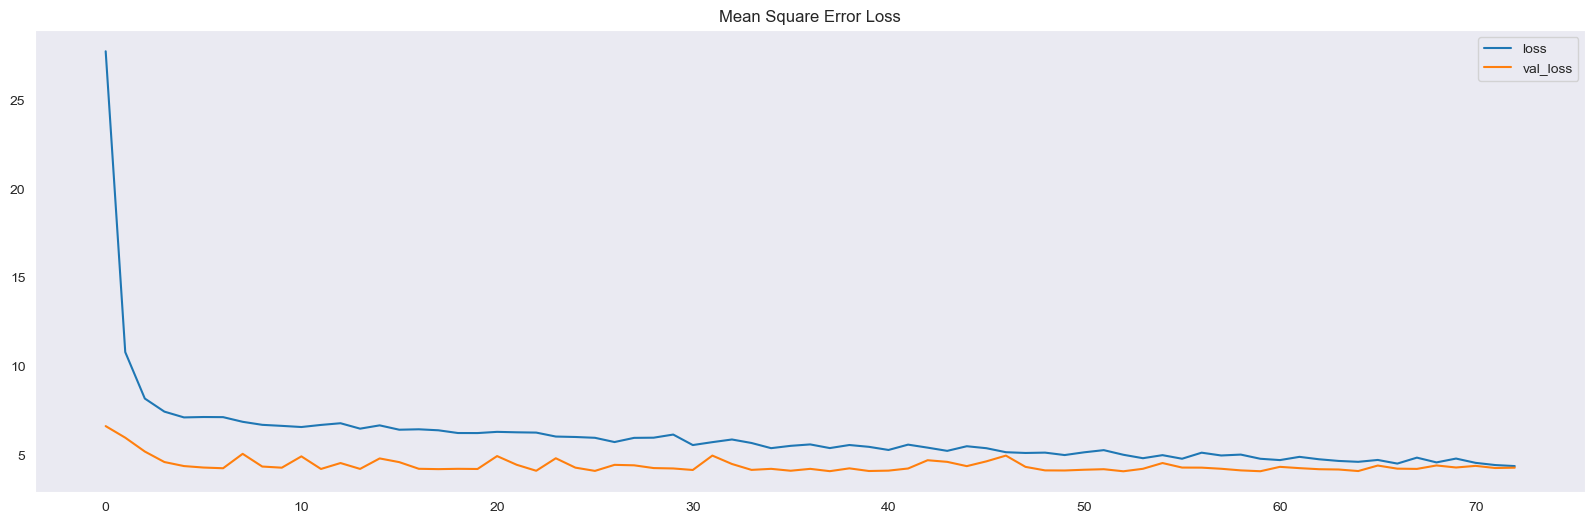

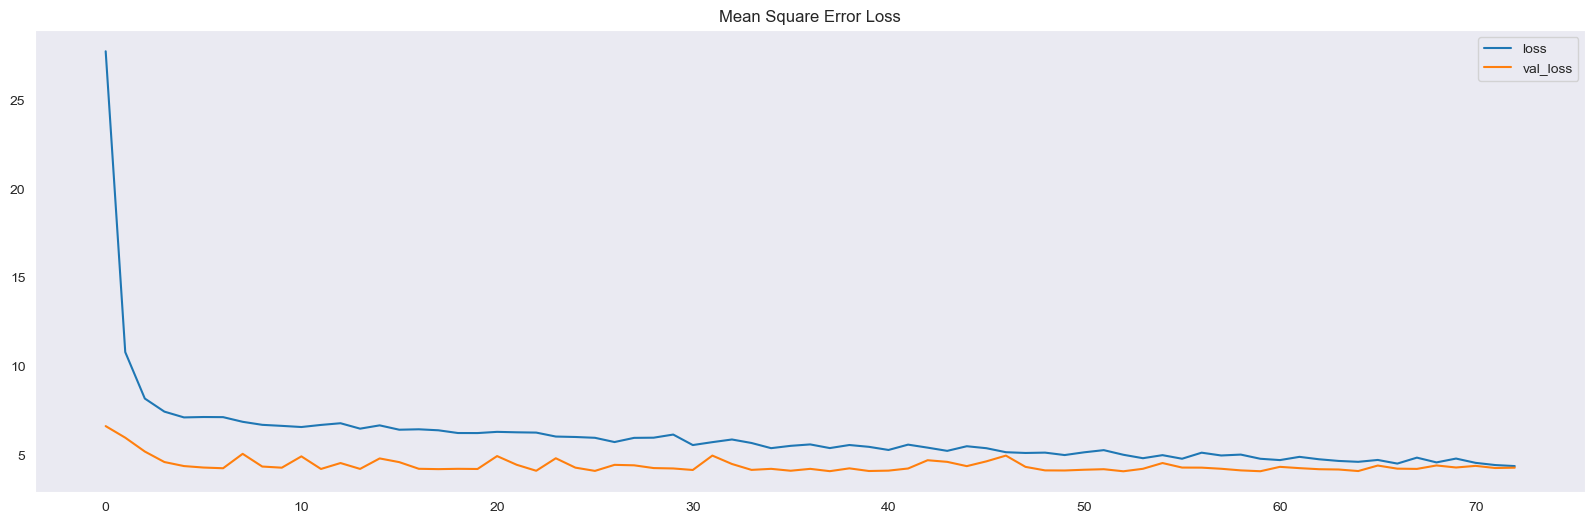

In [189]:
# error from above fitting the data
error = pd.DataFrame(history.history)

# plot for MSE loss
error.loc[:, ['loss','val_loss',]].plot(title="Mean Square Error Loss",figsize=(20,6))
plt.show()# error from above fitting the data
error = pd.DataFrame(history.history)

# plot for MSE loss
error.loc[:, ['loss','val_loss',]].plot(title="Mean Square Error Loss",figsize=(20,6))
plt.show()

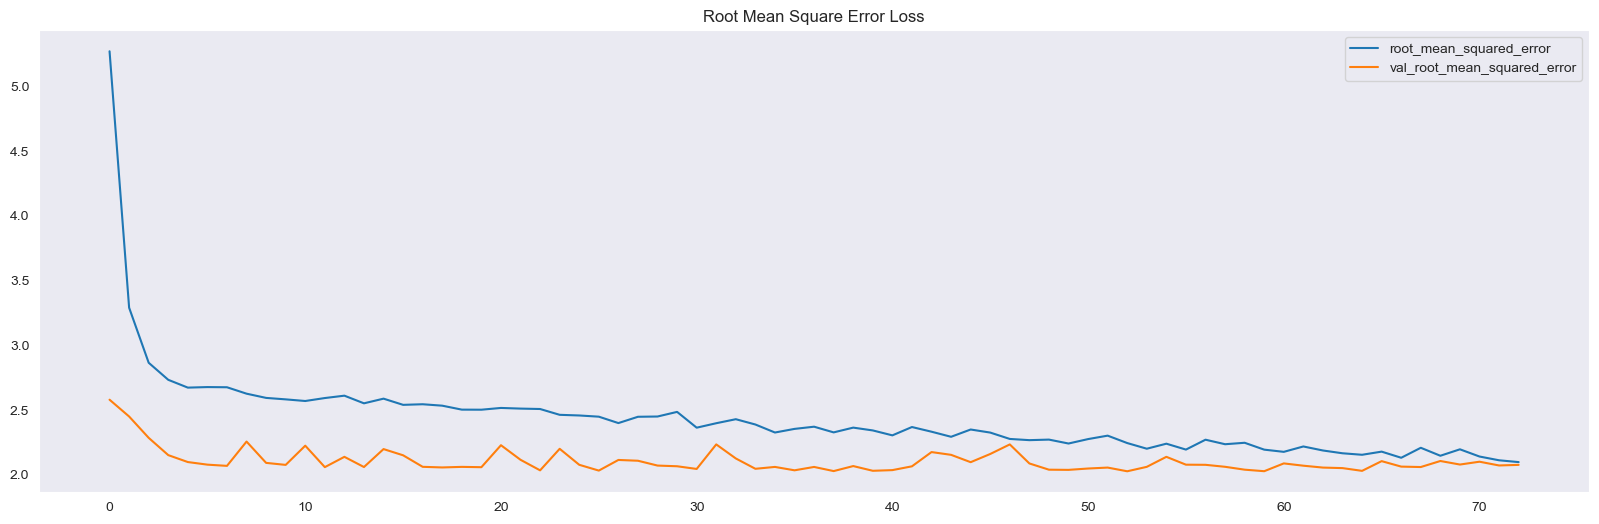

In [190]:
# plot for RMSE loss
error.loc[:, ['root_mean_squared_error','val_root_mean_squared_error',]].plot(title="Root Mean Square Error Loss",figsize=(20,6))
plt.show()

In [191]:
from sklearn.metrics import mean_squared_error
pred_train= model.predict(X_train)
print('RMSE of X_train data:',np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print('RMSE of X_test data:',np.sqrt(mean_squared_error(y_test,pred))) 

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE of X_train data: 1.8435274195284268
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
RMSE of X_test data: 2.0258939116048564


### Prediction 

In [192]:
# Example: New sample data
new_data = pd.DataFrame({
    'Sex': ['M'],  # Example categorical value
    'Length': [5.5],
    'Diameter': [2.1],
    'Height': [1.2],
    'Weight': [3.4],
    'Shucked Weight': [1.5],
    'Viscera Weight': [0.6],
    'Shell Weight': [0.7],
    'BMI': [3.4 / (5.5 ** 2)],  # Calculate the BMI
    'Len_dia_ratio': [5.5 / 2.1],
    'Weight_shuckedweight_ratio': [3.4 / 1.5],
    'Length_height_weight': [5.5 * 1.2 * 3.4]
})

# Apply preprocessing (similar to training)
new_data_processed = preprocessor.transform(new_data)

# Predict Age
predicted_age = model.predict(new_data_processed)

# Convert predicted age to years (if necessary)
predicted_age_years = predicted_age[0][0] / 12
print(f"Predicted Age (in months): {predicted_age[0][0]:.2f}")
print(f"Predicted Age (in years): {predicted_age_years:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age (in months): 22.47
Predicted Age (in years): 1.87


In [193]:
# Predict age for X_test
predicted_test_ages = model.predict(X_test)

# Compare predicted vs. actual values
comparison = pd.DataFrame({
    'Actual Age': y_test.values,
    'Predicted Age': predicted_test_ages.flatten()
})
print(comparison.head())

# Example: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_test_ages))
print(f"Test RMSE: {rmse:.2f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
   Actual Age  Predicted Age
0           6       5.990397
1           8       7.903568
2          11      10.000957
3           9       8.760069
4           6       5.886211
Test RMSE: 2.03


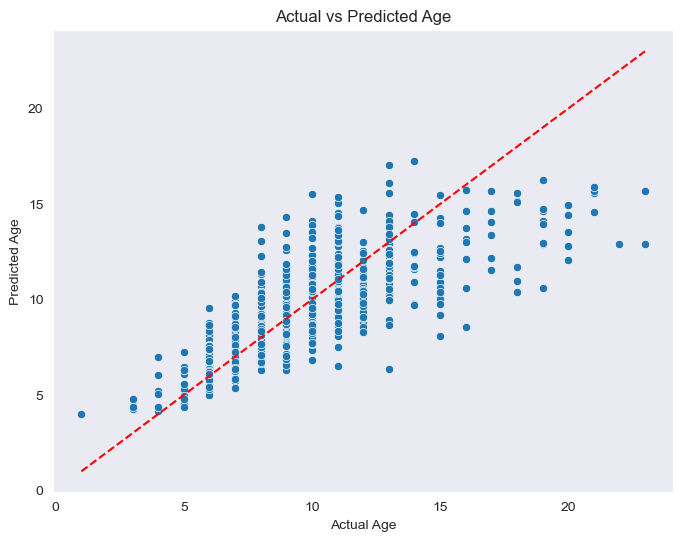

In [194]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predicted_test_ages.flatten())
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.show()


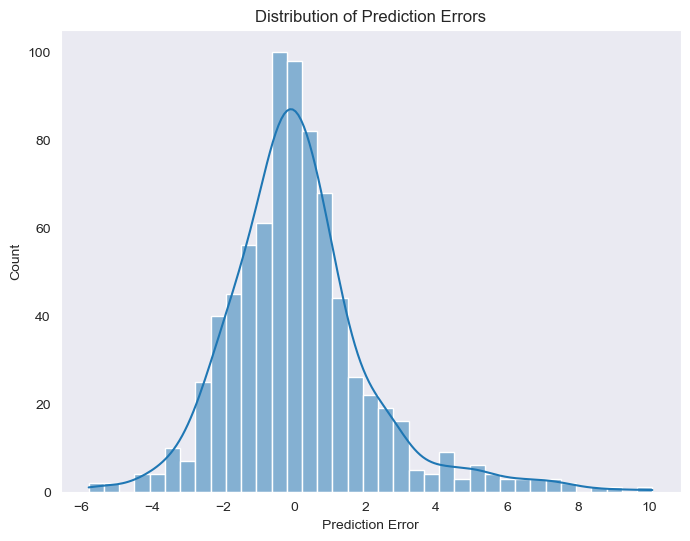

In [195]:
errors = y_test.values - predicted_test_ages.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()
